<a href="https://colab.research.google.com/github/JSEFERINO/MISALUMNOS20252/blob/main/LABORATORIO_14_FABIANA_ARIZA_MONSALVE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 14. **Prueba de Normalidad de un Conjunto de Datos**
## **Elaborado por:** Fabiana Ariza Monsalve
Este laboratorio tiene como propósito explorar la normalidad de los datos asociados a las calificaciones parciales de diferentes cursos. Se utilizarán herramientas estadísticas y gráficas para analizar la distribución de los datos y comparar resultados entre cursos.

In [ ]:
# Importación de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Instalación silenciosa de bioinfokit
!pip install bioinfokit &>/dev/null
from bioinfokit.analys import stat
from statsmodels.graphics.factorplots import interaction_plot


In [ ]:
# Carga de datos
url = 'https://raw.githubusercontent.com/JSEFERINO/ESTADISTICA-INFERENCIAL-2025/main/DATOS20510ULTIMOS.csv'
datos = pd.read_csv(url, delimiter=';')
datos

,CURSO,ASISTENCIA2,ASISTENCIA1,PARCIAL 1,PARCIAL 2,NRC,PROGRAMA,EDAD,PESO,ESTATURA,...,A: Facilidad para aprender cosas nuevas,B: Memoria y atención,C: Relacionar tu experiencias con lo que aprendes,D: Autoestima,E: Actitud hacia el Aprendizaje,F: Ambiente Familiar para estudiar,G: Ansiedad académica,H: Recursos Educativos,I: Mentalidad para superar adversidades,K: Regularidad en el estudio
0,PROBABILIDAD,100,90,3.6,4.30,2314,F_NEGOCIOS,20,55,160,...,BAJO,ALTO,MEDIO,ALTO,ALTO,BAJO,BAJO,BAJO,ALTO,ALTO
1,ESTADISTICAI,70,75,0.9,2.50,1136,DERECHO,18,80,185,...,ALTO,ALTO,ALTO,ALTO,ALTO,ALTO,MEDIO,MEDIO,MEDIO,MEDIO
2,PROBABILIDAD,85,95,3.9,3.80,2314,F_NEGOCIOS,19,60,158,...,BAJO,BAJO,BAJO,BAJO,MEDIO,MEDIO,MEDIO,MEDIO,MEDIO,MEDIO
3,PROBABILIDAD,5,5,2.9,0.50,2314,MECANICA,18,72,181,...,MEDIO,ALTO,BAJO,MEDIO,MEDIO,ALTO,MEDIO,ALTO,MEDIO,MEDIO
4,ESTADISTICAI,20,70,3.7,0.55,1009,PSICOLOGÍA,19,45,163,...,ALTO,MEDIO,MEDIO,ALTO,ALTO,BAJO,MEDIO,BAJO,ALTO,BAJO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,PROBABILIDAD,90,90,2.3,2.10,2314,F_NEGOCIOS,18,59,176,...,MEDIO,MEDIO,MEDIO,ALTO,ALTO,ALTO,ALTO,BAJO,ALTO,ALTO
70,PROBABILIDAD,85,95,2.0,3.10,2314,F_NEGOCIOS,18,60,171,...,BAJO,BAJO,ALTO,ALTO,ALTO,BAJO,ALTO,BAJO,ALTO,BAJO
71,ESTADISTICAI,65,75,1.7,2.95,1136,DERECHO,20,55,164,...,BAJO,MEDIO,MEDIO,ALTO,ALTO,ALTO,BAJO,BAJO,MEDIO,BAJO
72,ESTADISTICAI,100,100,2.3,3.20,2313,PSICOLOGÍA,19,67,171,...,BAJO,BAJO,BAJO,BAJO,MEDIO,BAJO,BAJO,BAJO,BAJO,BAJO


In [ ]:
# Conversión de la columna NRC a tipo objeto
datos['NRC'] = datos['NRC'].astype(object)

### **Visualización de los Resultados del Parcial 1 por Curso**


<ipython-input-7-5af4c293dee5>:9: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.boxplot(


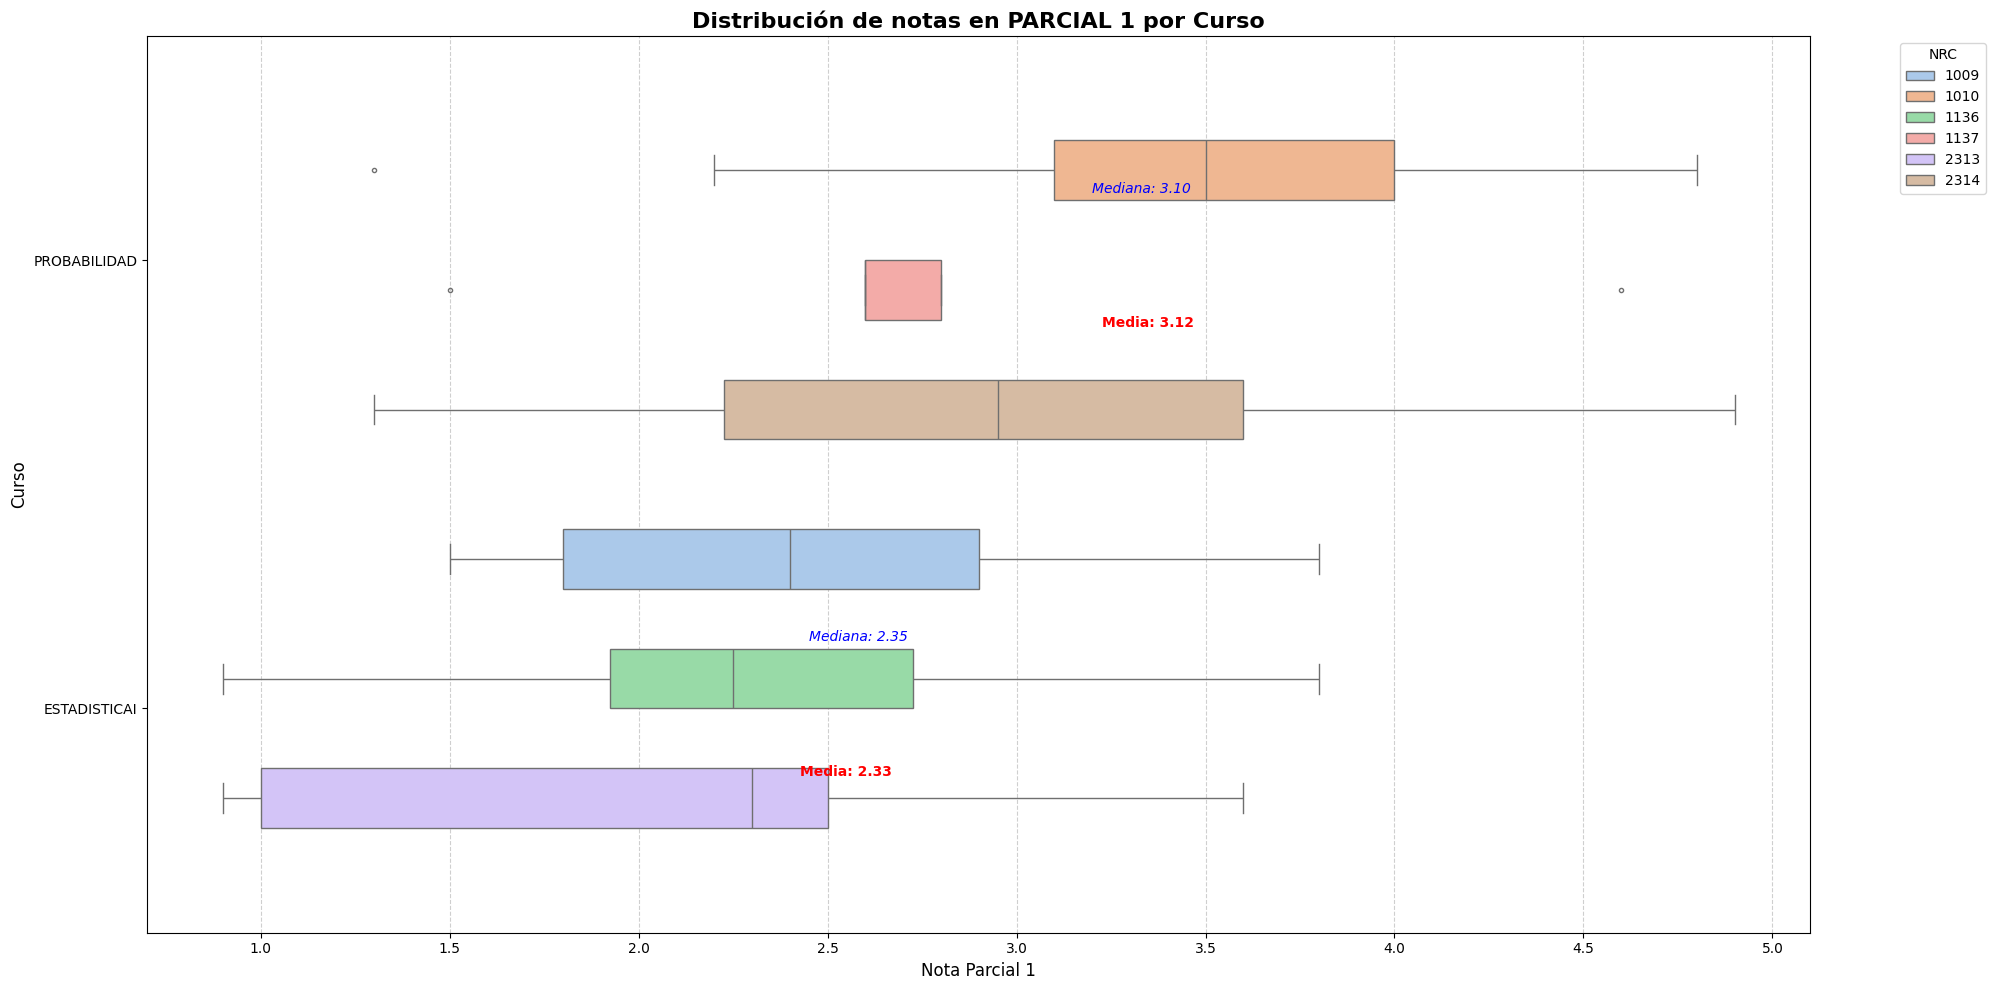

In [ ]:
# Gráfico de caja para PARCIAL 1 con medianas y promedios anotados
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title('Distribución de notas en PARCIAL 1 por Curso', fontsize=16, fontweight='bold')

# Colores personalizados
palette = sns.color_palette("pastel")

# Boxplot
sns.boxplot(
    y="CURSO", x="PARCIAL 1", hue='NRC', data=datos,
    ax=ax, palette=palette, showmeans=False, fliersize=3
)

# Cálculo de estadísticos
grupo_curso = datos.groupby('CURSO')['PARCIAL 1']
mean_by_group = grupo_curso.mean()
median_by_group = grupo_curso.median()

# Anotación de media y mediana
for i, curso in enumerate(datos['CURSO'].dropna().unique()):
    media = mean_by_group[curso]
    mediana = median_by_group[curso]

    ax.text(media + 0.1, i + 0.15, f'Media: {media:.2f}', color='red', fontweight='bold')
    ax.text(mediana + 0.1, i - 0.15, f'Mediana: {mediana:.2f}', color='blue', fontstyle='italic')

plt.xlabel('Nota Parcial 1', fontsize=12)
plt.ylabel('Curso', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.legend(title='NRC', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



### **Visualización de los Resultados del Parcial 2 por Curso**

<ipython-input-8-437027b2d4ee>:6: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.boxplot(


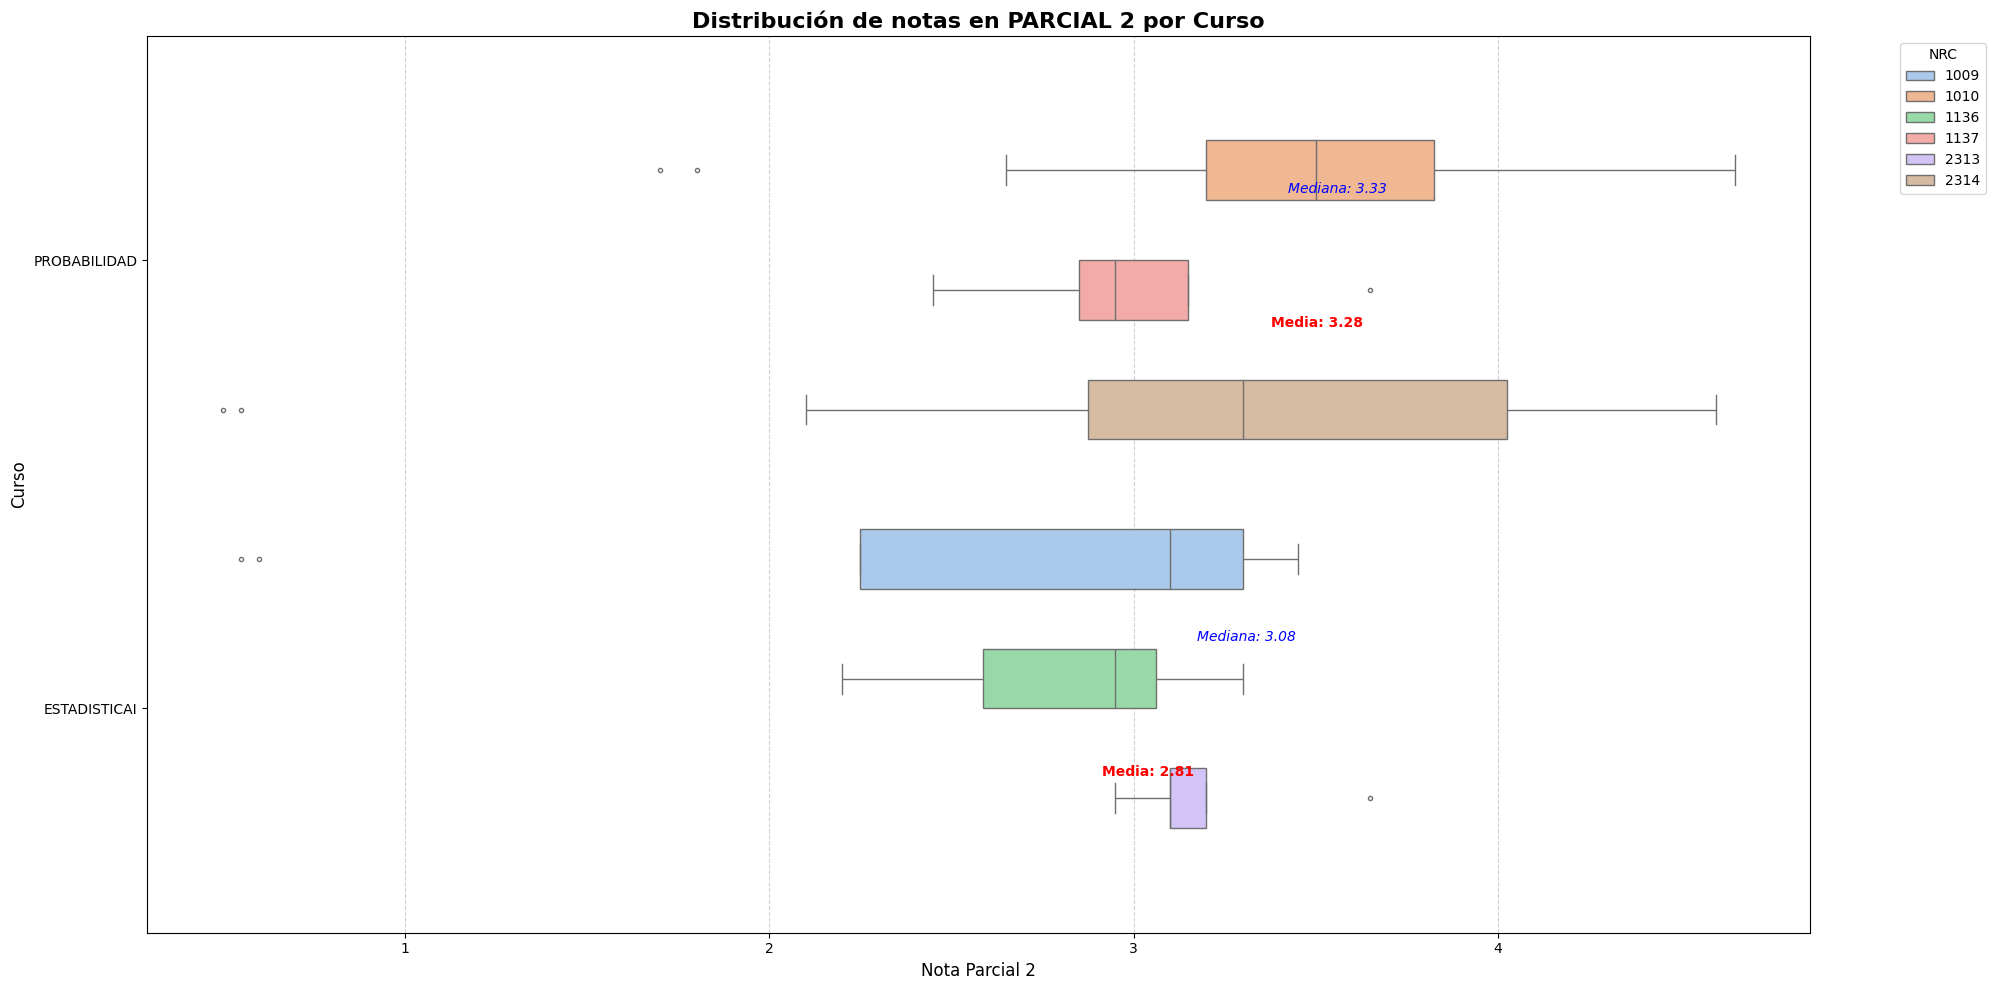

In [ ]:
# Gráfico de caja para PARCIAL 2 con medianas y promedios anotados
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title('Distribución de notas en PARCIAL 2 por Curso', fontsize=16, fontweight='bold')

# Boxplot
sns.boxplot(
    y="CURSO", x="PARCIAL 2", hue='NRC', data=datos,
    ax=ax, palette=palette, showmeans=False, fliersize=3
)

# Cálculo de estadísticos
grupo_curso = datos.groupby('CURSO')['PARCIAL 2']
mean_by_group = grupo_curso.mean()
median_by_group = grupo_curso.median()

# Anotación de media y mediana
for i, curso in enumerate(datos['CURSO'].dropna().unique()):
    media = mean_by_group[curso]
    mediana = median_by_group[curso]

    ax.text(media + 0.1, i + 0.15, f'Media: {media:.2f}', color='red', fontweight='bold')
    ax.text(mediana + 0.1, i - 0.15, f'Mediana: {mediana:.2f}', color='blue', fontstyle='italic')

plt.xlabel('Nota Parcial 2', fontsize=12)
plt.ylabel('Curso', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.legend(title='NRC', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



# **🔍 Pruebas de Normalidad**

El análisis de normalidad es un paso esencial antes de aplicar técnicas estadísticas que suponen que los datos siguen una distribución normal. A continuación, se describen las pruebas más utilizadas para verificar esta condición:

---

### 🔹 1. **Prueba de Shapiro-Wilk**

- Recomendable para muestras pequeñas \( n < 50 \), aunque también es válida para tamaños mayores.
- Es muy **sensible** a desviaciones de la normalidad.
- **Hipótesis nula**: $H_0$: los datos provienen de una distribución normal.
- **Hipótesis alternativa**: $H_1$: los datos no provienen de una distribución normal.

---

### 🔹 2. **Prueba de Kolmogórov-Smirnov (K-S)**

- Compara la distribución empírica de los datos con una distribución teórica, como la normal.
- Es menos potente que otras pruebas para detectar desviaciones leves de la normalidad.
- Se puede usar junto con la **corrección de Lilliefors** cuando los parámetros de la distribución teórica son estimados a partir de los datos.

---

### 🔹 3. **Prueba de Anderson-Darling**

- Variante de la prueba K-S que da **mayor peso a los extremos** (colas) de la distribución.
- Suele tener mayor poder estadístico que K-S.
- Permite comparar los datos con varias distribuciones teóricas, no solo la normal.

---

### 🔹 4. **Prueba de Jarque-Bera**

- Basada en los coeficientes de **asimetría** (skewness) y **curtosis** (kurtosis).
- Ampliamente utilizada en campos como la economía y las finanzas.
- Más adecuada para muestras **grandes**.

---

### 🔹 5. **Prueba de D’Agostino y Pearson**

- Combina medidas de asimetría y curtosis para evaluar la normalidad.
- Más robusta con **muestras de tamaño moderado a grande**.
- Frecuentemente utilizada en contextos científicos y de ingeniería.

---

###  **Recomendaciones prácticas**

- Para muestras **pequeñas**: usar preferiblemente **Shapiro-Wilk**.
- Para muestras **grandes**: considerar **D’Agostino-Pearson** o **Jarque-Bera**.
- Siempre es útil acompañar las pruebas con representaciones gráficas como:
  - **Histogramas**
  - **Gráficos Q-Q (QQ-plot)**
  - **Diagramas de caja (boxplot)**

---


### 📌Prueba de Shapiro-Wilk para **parcial 2**





In [ ]:
# 📊 Prueba de normalidad Shapiro-Wilk sobre la variable PARCIAL 2
from scipy.stats import shapiro

# Eliminar valores faltantes
parcial2 = datos['PARCIAL 2'].dropna()

# Realizar la prueba de Shapiro-Wilk
shapiro_result = shapiro(parcial2)
estadistico = shapiro_result.statistic
valor_p = shapiro_result.pvalue

# Mostrar resultados
print("📌 Prueba de Shapiro-Wilk para 'PARCIAL 2'")
print(f"Estadístico W = {estadistico:.4f}")
print(f"Valor p = {valor_p:.4f}")

# Nivel de significancia
alpha = 0.05

# Decisión
if valor_p > alpha:
    conclusion = "✅ No se rechaza la hipótesis nula: los datos parecen provenir de una distribución normal."
else:
    conclusion = "❌ Se rechaza la hipótesis nula: los datos no parecen provenir de una distribución normal."

print(conclusion)


📌 Prueba de Shapiro-Wilk para 'PARCIAL 2'
Estadístico W = 0.9021
Valor p = 0.0000
❌ Se rechaza la hipótesis nula: los datos no parecen provenir de una distribución normal.


### 📌 **Interpretación:** Prueba de Shapiro-Wilk para "ESTATURA"

La prueba de **Shapiro-Wilk** se utiliza para evaluar la normalidad de una variable, bajo la hipótesis nula $ H_0 $:  
*“Los datos provienen de una distribución normal.”*

- Si el valor $ p > \alpha = 0.05 $, no se rechaza $ H_0 $ → **los datos son compatibles con la normalidad.**
- Si $ p \leq \alpha $, se rechaza $ H_0 $ → **los datos no siguen una distribución normal.**

> En esta sección se aplica la prueba sobre la variable **ESTATURA**, descartando previamente los valores nulos.  
> La decisión se presenta de manera automática al final de la celda de código.



In [ ]:
# 📊 Prueba de normalidad Shapiro-Wilk sobre la variable ESTATURA
from scipy.stats import shapiro

# Eliminar valores faltantes
estatura = datos['ESTATURA'].dropna()

# Realizar la prueba de Shapiro-Wilk
shapiro_result = shapiro(estatura)
estadistico = shapiro_result.statistic
valor_p = shapiro_result.pvalue

# Mostrar resultados
print("📌 Prueba de Shapiro-Wilk para 'ESTATURA'")
print(f"Estadístico W = {estadistico:.4f}")
print(f"Valor p = {valor_p:.4f}")

# Nivel de significancia
alpha = 0.05

# Decisión
if valor_p > alpha:
    conclusion = "✅ No se rechaza la hipótesis nula: los datos parecen provenir de una distribución normal."
else:
    conclusion = "❌ Se rechaza la hipótesis nula: los datos no parecen provenir de una distribución normal."

print(conclusion)


📌 Prueba de Shapiro-Wilk para 'ESTATURA'
Estadístico W = 0.9823
Valor p = 0.3866
✅ No se rechaza la hipótesis nula: los datos parecen provenir de una distribución normal.


### **Gráfico**

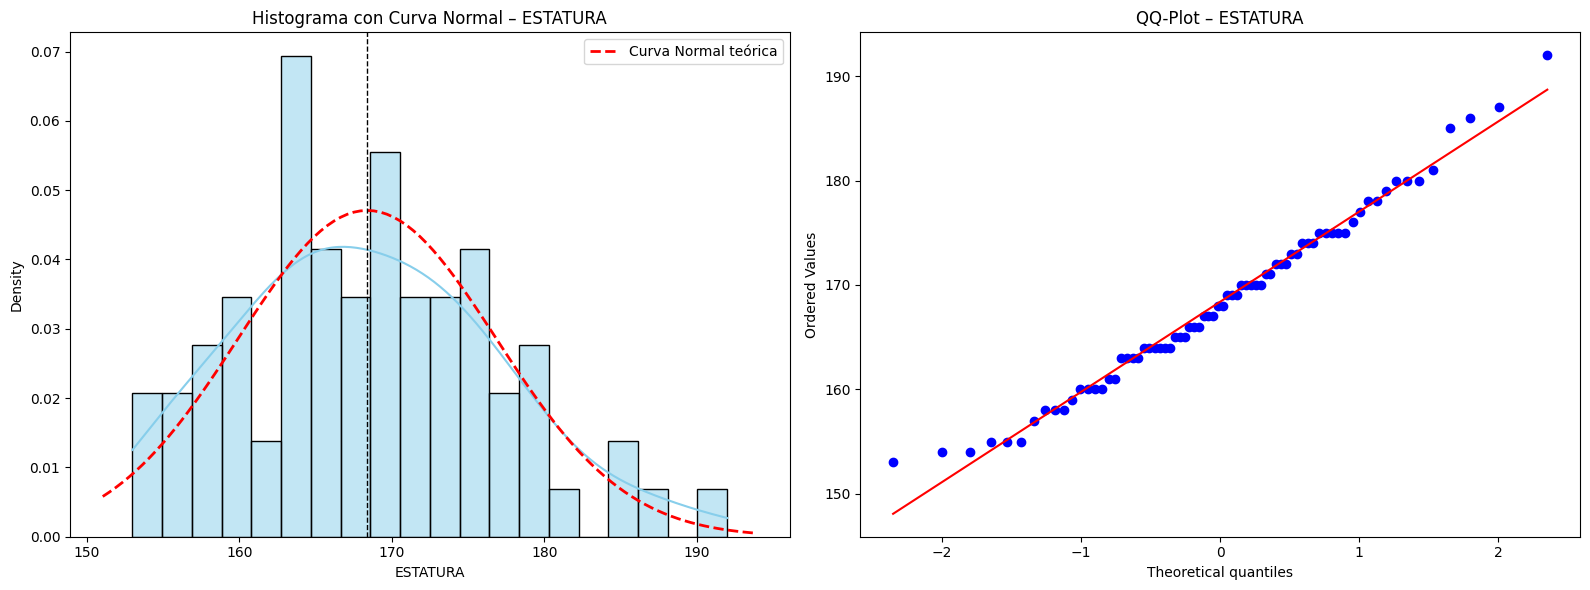

In [ ]:
# 📈 Gráficos para evaluar la normalidad de la variable ESTATURA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Eliminar valores nulos
estatura = datos['ESTATURA'].dropna()

# Crear figura con dos subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Histograma con curva de densidad normal
sns.histplot(estatura, kde=True, stat="density", color='skyblue', ax=axs[0], bins=20)
mu, std = np.mean(estatura), np.std(estatura)
xmin, xmax = axs[0].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
axs[0].plot(x, p, 'r--', linewidth=2, label='Curva Normal teórica')
axs[0].axvline(mu, color='black', linestyle='dashed', linewidth=1)
axs[0].set_title('Histograma con Curva Normal – ESTATURA')
axs[0].legend()

# QQ-Plot
stats.probplot(estatura, dist="norm", plot=axs[1])
axs[1].set_title('QQ-Plot – ESTATURA')

plt.tight_layout()
plt.show()


### 📌 Prueba de Kolmogórov-Smirnov (K-S) para **PARCIAL 2**

La prueba de Kolmogórov-Smirnov compara la distribución empírica de los datos con una distribución teórica específica, en este caso, la normal $ \mathcal{N}(\mu, \sigma) $, utilizando la media $ \mu $ y la desviación estándar $ \sigma $ estimadas de la muestra.

- **Hipótesis nula ($H_0$)**: los datos provienen de una distribución normal.
- **Estadístico $D$**: mide la máxima diferencia entre la función de distribución empírica y la distribución teórica.
- **Valor $p$**: si $p < \alpha = 0.05$, se **rechaza** $H_0$.

> Esta prueba es útil para confirmar si los datos se ajustan a una distribución normal, especialmente cuando se desea contrastar empíricamente contra una forma teórica.


In [ ]:
# 📌 Prueba de Kolmogórov-Smirnov para la variable PARCIAL 2
import pandas as pd
import numpy as np
import scipy.stats as stats

# Simulación de datos (puede eliminarse si ya se tiene el DataFrame real)
np.random.seed(42)
datos = pd.DataFrame({
    'PARCIAL 2': np.random.normal(loc=70, scale=10, size=100)
})

# 📉 Media y desviación estándar de la muestra
mu, sigma = datos['PARCIAL 2'].mean(), datos['PARCIAL 2'].std()

# 🧪 Prueba K-S comparando con N(mu, sigma)
ks_test = stats.kstest(datos['PARCIAL 2'].dropna(), 'norm', args=(mu, sigma))
statistic = ks_test.statistic
p_value = ks_test.pvalue

# 🔍 Nivel de significancia
alpha = 0.05

# 📌 Conclusión
decision = (
    "✅ No se rechaza H₀: Los datos parecen provenir de una distribución normal."
    if p_value > alpha else
    "❌ Se rechaza H₀: Los datos no parecen provenir de una distribución normal."
)

# 📊 Mostrar resultados
print("📊 Resultados de la Prueba de Kolmogórov-Smirnov (K-S) – PARCIAL 2:")
print(f"Estadístico D: {statistic:.4f}")
print(f"Valor p: {p_value:.4f}")
print(decision)


📊 Resultados de la Prueba de Kolmogórov-Smirnov (K-S) – PARCIAL 2:
Estadístico D: 0.0518
Valor p: 0.9386
✅ No se rechaza H₀: Los datos parecen provenir de una distribución normal.


**Gráfico**

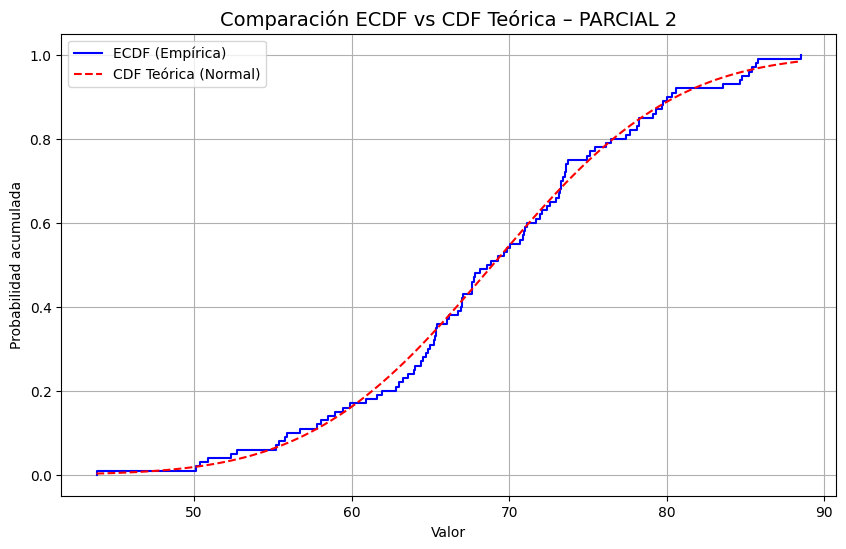

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import norm

# Datos ordenados y ECDF
datos_parcial2 = datos['PARCIAL 2'].dropna().sort_values()
ecdf = ECDF(datos_parcial2)

# Generar puntos para la CDF teórica con la misma media y desviación estándar
mu = datos_parcial2.mean()
sigma = datos_parcial2.std()
x = np.linspace(datos_parcial2.min(), datos_parcial2.max(), 100)
cdf_teorica = norm.cdf(x, loc=mu, scale=sigma)

# Graficar ECDF vs CDF
plt.figure(figsize=(10, 6))
plt.step(ecdf.x, ecdf.y, where='post', label='ECDF (Empírica)', color='blue') # función de distribución acumulada empírica (ECDF)
plt.plot(x, cdf_teorica, label='CDF Teórica (Normal)', color='red', linestyle='--') # CDF teórica de la distribución normal.


plt.title('Comparación ECDF vs CDF Teórica – PARCIAL 2', fontsize=14)
plt.xlabel('Valor')
plt.ylabel('Probabilidad acumulada')
plt.legend()
plt.grid(True)
plt.show()


#  **Ojiva con la distribución ideal y la Ojiva acumulada de los Datos**


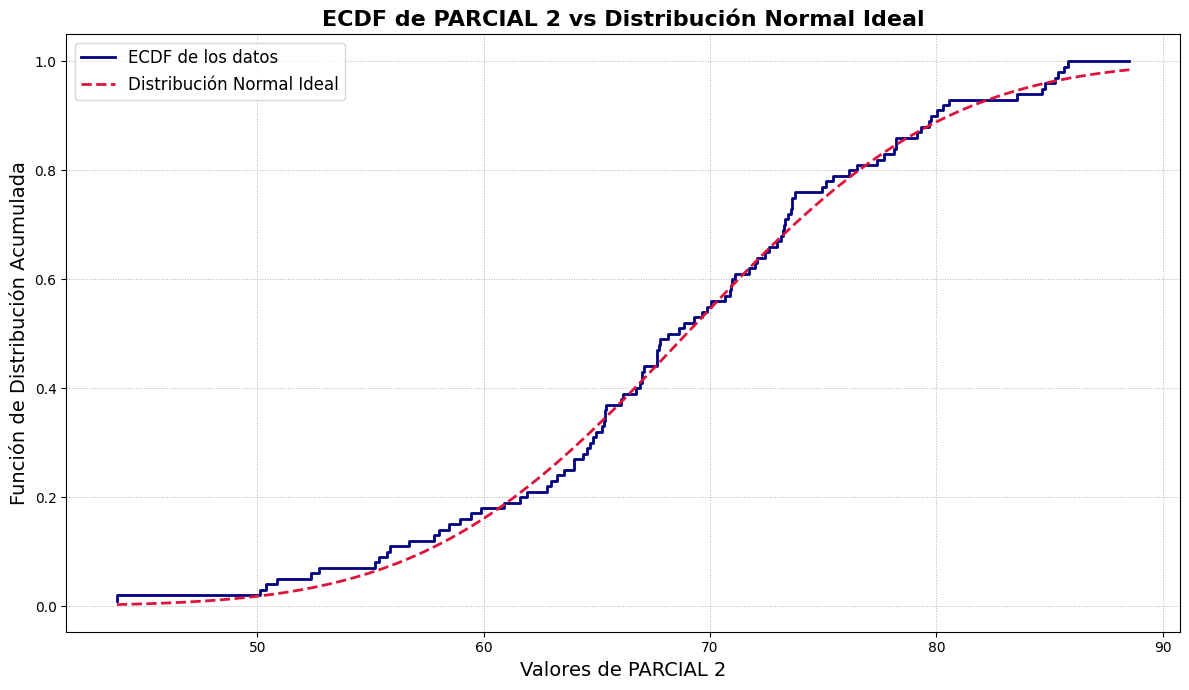

In [ ]:
plt.figure(figsize=(12, 7))

# Calcular ECDF para PARCIAL 2 sin valores nulos
data_clean = datos['PARCIAL 2'].dropna()
ecdf = ECDF(data_clean)
plt.step(ecdf.x, ecdf.y, label='ECDF de los datos', color='navy', linewidth=2)

# Ajustar distribución normal ideal con media y desviación estándar
mu, std = stats.norm.fit(data_clean)
x = np.linspace(data_clean.min(), data_clean.max(), 150)
plt.plot(x, stats.norm.cdf(x, loc=mu, scale=std), label='Distribución Normal Ideal', color='crimson', linestyle='--', linewidth=2)

# Títulos y etiquetas
plt.title('ECDF de PARCIAL 2 vs Distribución Normal Ideal', fontsize=16, fontweight='bold')
plt.xlabel('Valores de PARCIAL 2', fontsize=14)
plt.ylabel('Función de Distribución Acumulada', fontsize=14)

# Leyenda y cuadricula
plt.legend(fontsize=12)
plt.grid(visible=True, linestyle=':', linewidth=0.7)
plt.tight_layout()
plt.show()


# **Prueba de Kolmogorov-Smirnov Y OJIVA para ESTATURA**

Columnas disponibles: ['ESTATURA']
Prueba de Kolmogorov-Smirnov para ESTATURA:
Estadístico D = 0.0518
Valor p = 0.9386
✅ No se rechaza $H_0$: los datos parecen provenir de una distribución normal.


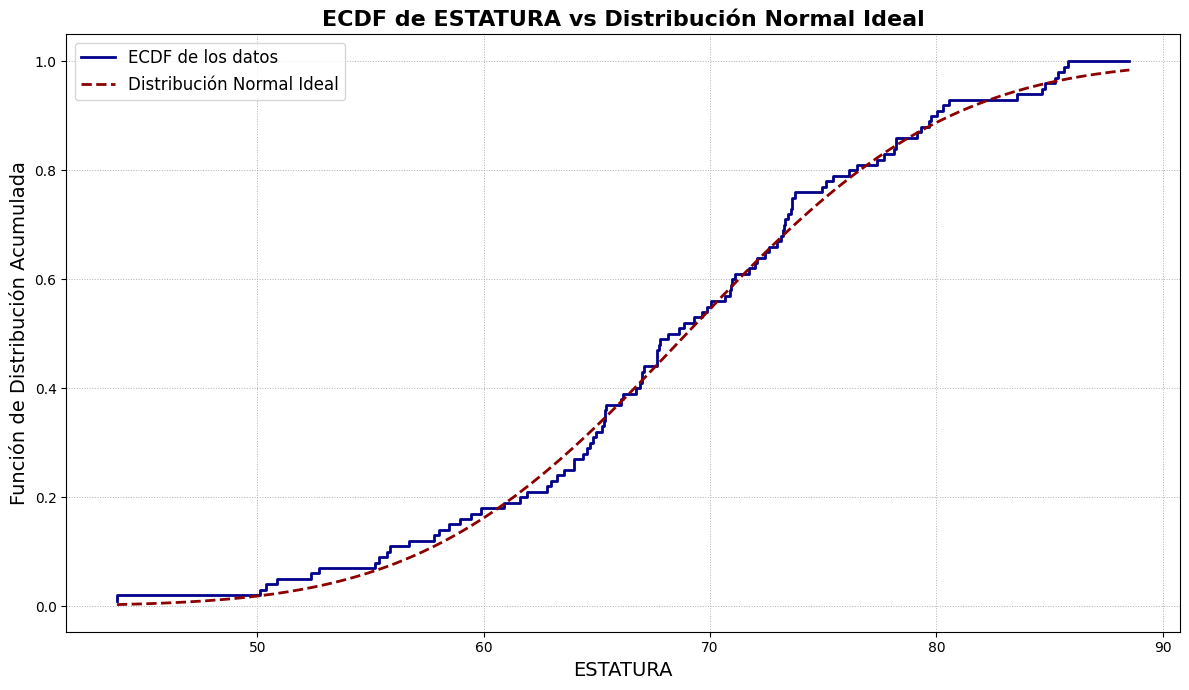

In [ ]:
# Simulación de DataFrame para asegurar la estructura
np.random.seed(42)
datos = pd.DataFrame({
    'ESTATURA': np.random.normal(loc=70, scale=10, size=100)
})

# Confirmar columnas
print("Columnas disponibles:", datos.columns.tolist())

# Prueba de Kolmogorov-Smirnov para 'ESTATURA' con media y desviación estándar ajustadas
mu, sigma = datos['ESTATURA'].mean(), datos['ESTATURA'].std()
ks_test = stats.kstest(datos['ESTATURA'].dropna(), 'norm', args=(mu, sigma))
statistic = ks_test.statistic
p_value = ks_test.pvalue

# Decisión basada en alfa = 0.05
alpha = 0.05
decision = (
    "✅ No se rechaza $H_0$: los datos parecen provenir de una distribución normal."
    if p_value > alpha else
    "❌ Se rechaza $H_0$: los datos no parecen provenir de una distribución normal."
)

print(f"Prueba de Kolmogorov-Smirnov para ESTATURA:")
print(f"Estadístico D = {statistic:.4f}")
print(f"Valor p = {p_value:.4f}")
print(decision)

# Gráfico ECDF vs Distribución Normal Ideal
plt.figure(figsize=(12, 7))

# Calcular ECDF
data_clean = datos['ESTATURA'].dropna()
ecdf = ECDF(data_clean)
plt.step(ecdf.x, ecdf.y, label='ECDF de los datos', color='darkblue', linewidth=2)

# Distribución normal ideal ajustada
x = np.linspace(data_clean.min(), data_clean.max(), 150)
plt.plot(x, stats.norm.cdf(x, loc=mu, scale=sigma), label='Distribución Normal Ideal', color='darkred', linestyle='--', linewidth=2)

plt.title('ECDF de ESTATURA vs Distribución Normal Ideal', fontsize=16, fontweight='bold')
plt.xlabel('ESTATURA', fontsize=14)
plt.ylabel('Función de Distribución Acumulada', fontsize=14)
plt.legend(fontsize=12)
plt.grid(visible=True, linestyle=':', linewidth=0.7)
plt.tight_layout()
plt.show()

# **Prueba de Shapiro-Wilk 'CURSO' vs 'PARCIAL 2'**



Shapiro-Wilk Test para PARCIAL 2 en curso: C
Estadístico: 0.9778
P-valor: 0.7792
✅ No se rechaza H₀: Los datos parecen normales.


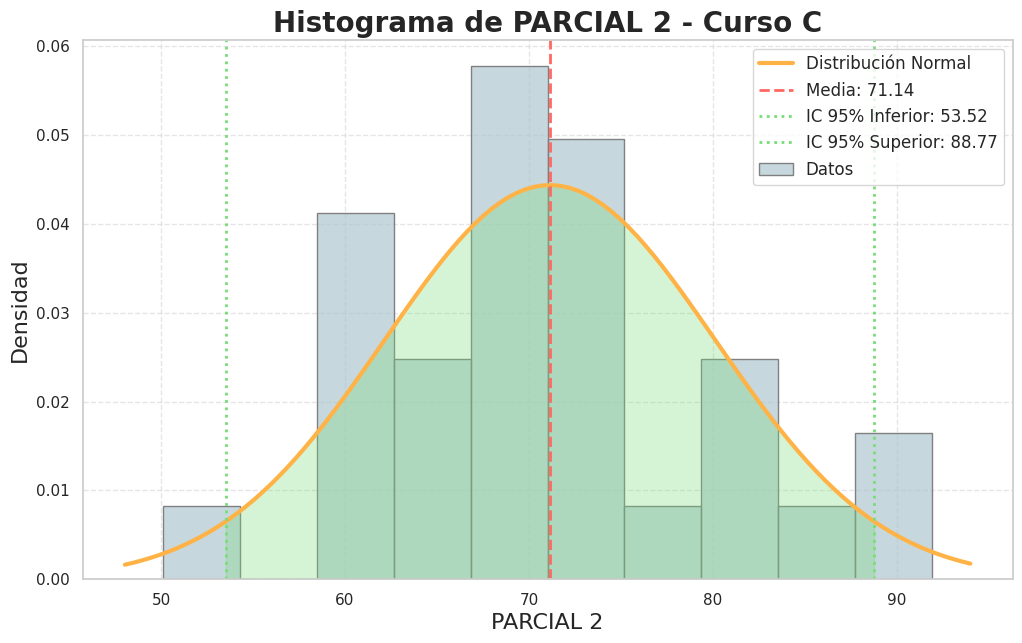

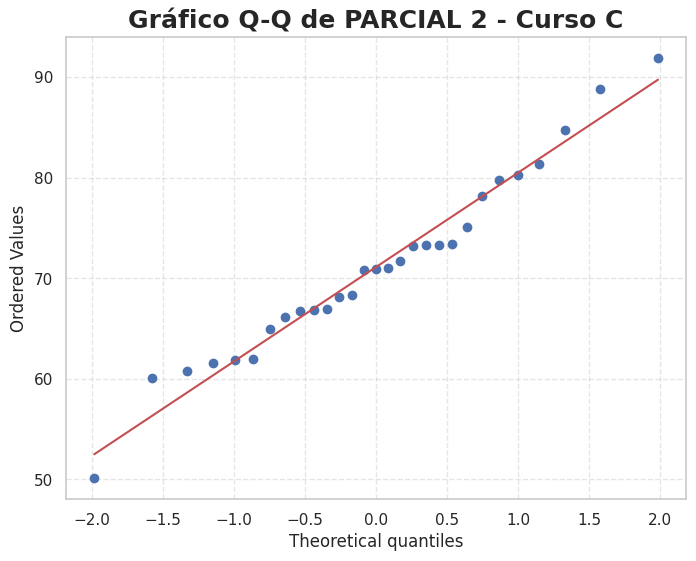


Shapiro-Wilk Test para PARCIAL 2 en curso: A
Estadístico: 0.9806
P-valor: 0.8969
✅ No se rechaza H₀: Los datos parecen normales.


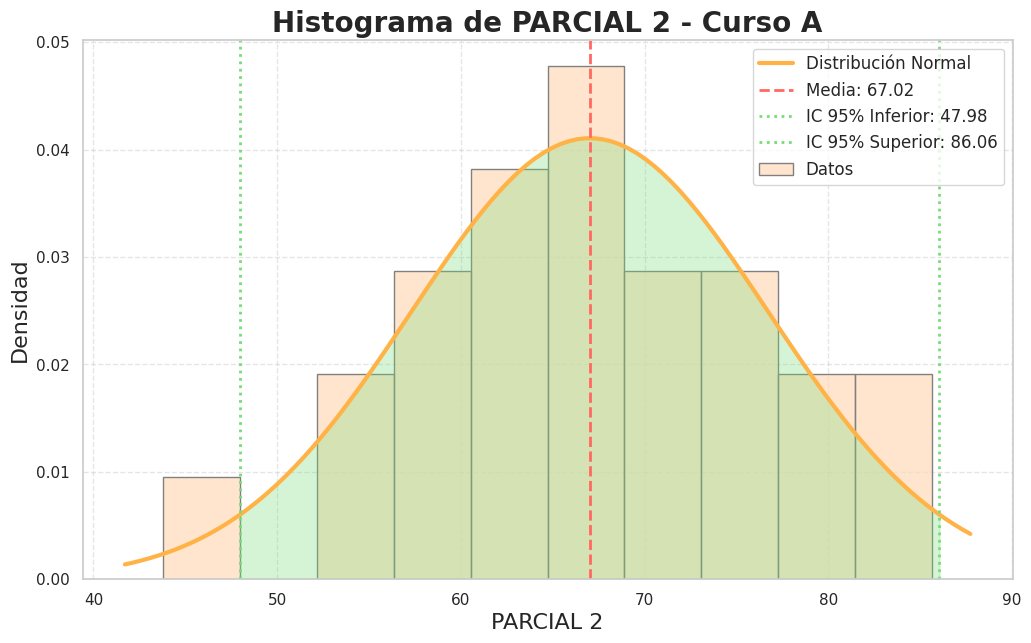

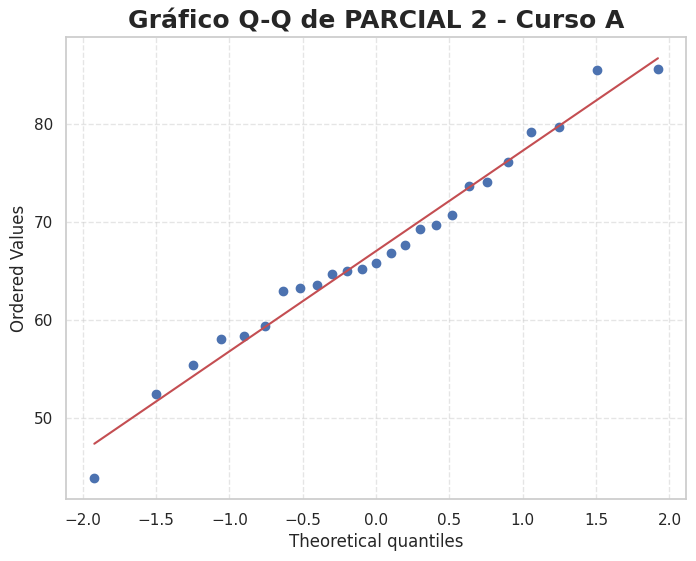


Shapiro-Wilk Test para PARCIAL 2 en curso: B
Estadístico: 0.9863
P-valor: 0.9257
✅ No se rechaza H₀: Los datos parecen normales.


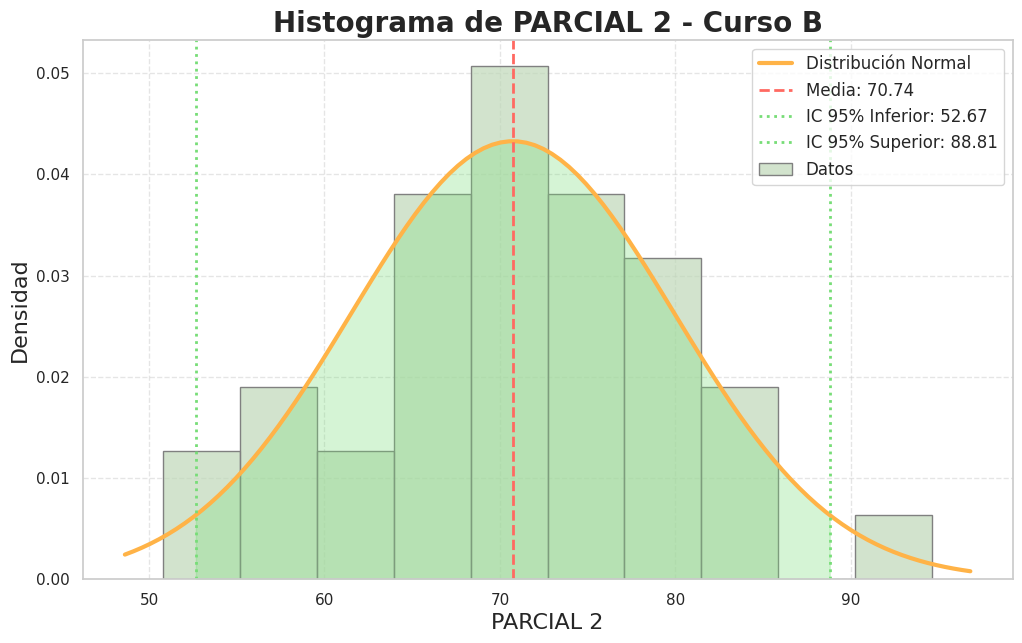

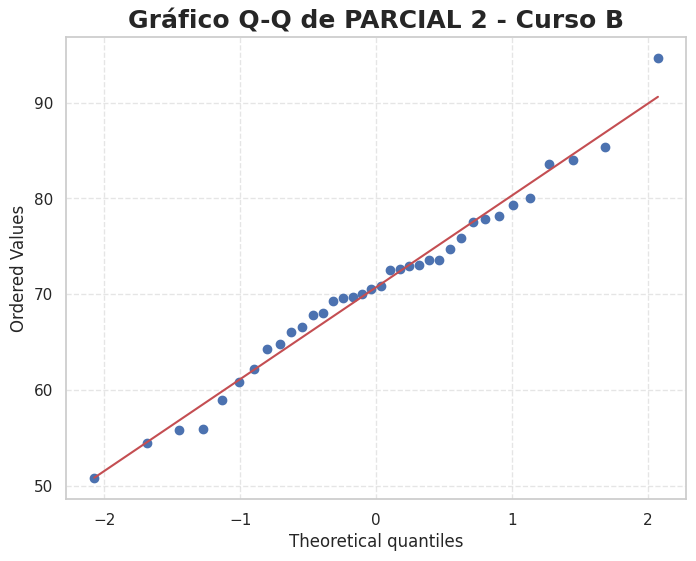

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro

# Configuración estética general
sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 14, 'axes.titlesize': 18, 'axes.titleweight': 'bold'})

# Simulación del DataFrame con columnas 'CURSO' y 'PARCIAL 2'
np.random.seed(42)
cursos = ['A', 'B', 'C']
datos = pd.DataFrame({
    'CURSO': np.random.choice(cursos, size=90),
    'PARCIAL 2': np.random.normal(loc=70, scale=10, size=90)
})

# Paleta pastel
palette = ["#AEC6CF", "#FFDAB9", "#BFD8B8"]  # Azul pastel, durazno, verde menta

for i, curso in enumerate(datos['CURSO'].unique()):
    subset = datos[datos['CURSO'] == curso]['PARCIAL 2'].dropna()
    if len(subset) >= 3:
        shapiro_test = shapiro(subset)
        statistic = shapiro_test.statistic
        p_value = shapiro_test.pvalue

        print(f"\nShapiro-Wilk Test para PARCIAL 2 en curso: {curso}")
        print(f"Estadístico: {statistic:.4f}")
        print(f"P-valor: {p_value:.4f}")

        alpha = 0.05
        decision = (
            "✅ No se rechaza H₀: Los datos parecen normales."
            if p_value > alpha else
            "❌ Se rechaza H₀: Los datos no parecen normales."
        )
        print(decision)

        # Histograma + curva normal
        plt.figure(figsize=(12, 7))
        sns.histplot(subset, bins=10, stat="density", color=palette[i], kde=False, edgecolor='gray', alpha=0.7, label='Datos')

        mu, std = stats.norm.fit(subset)
        xmin, xmax = plt.xlim()
        x = np.linspace(xmin, xmax, 100)
        p = stats.norm.pdf(x, mu, std)
        plt.plot(x, p, '#FFB347', linewidth=3, label='Distribución Normal')  # Naranja pastel

        # Líneas para media e intervalo de confianza 95%
        plt.axvline(mu, color='#FF6961', linestyle='--', linewidth=2, label=f'Media: {mu:.2f}')  # Rojo pastel
        ic_lower, ic_upper = stats.norm.interval(0.95, loc=mu, scale=std)
        plt.axvline(ic_lower, color='#77DD77', linestyle=':', linewidth=2, label=f'IC 95% Inferior: {ic_lower:.2f}')  # Verde pastel
        plt.axvline(ic_upper, color='#77DD77', linestyle=':', linewidth=2, label=f'IC 95% Superior: {ic_upper:.2f}')

        # Relleno del intervalo de confianza
        x_ci = np.linspace(ic_lower, ic_upper, 100)
        p_ci = stats.norm.pdf(x_ci, mu, std)
        plt.fill_between(x_ci, p_ci, color='#77DD77', alpha=0.3)

        plt.title(f'Histograma de PARCIAL 2 - Curso {curso}', fontsize=20, fontweight='bold')
        plt.xlabel('PARCIAL 2', fontsize=16)
        plt.ylabel('Densidad', fontsize=16)
        plt.legend(fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.show()

        # Q-Q Plot
        plt.figure(figsize=(8, 6))
        stats.probplot(subset, dist="norm", plot=plt)
        plt.title(f'Gráfico Q-Q de PARCIAL 2 - Curso {curso}', fontsize=18, fontweight='bold')
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.show()
    else:
        print(f"⚠️ No se puede realizar la prueba para el curso {curso} (menos de 3 datos).")


# **Prueba de Shapiro-Wilk 'CURSO' vs 'ESTATURA'**


Shapiro-Wilk Test para ESTATURA en curso: C
Estadístico: 0.9831
P-valor: 0.8831
✅ No se rechaza $H_0$: Los datos parecen normales.


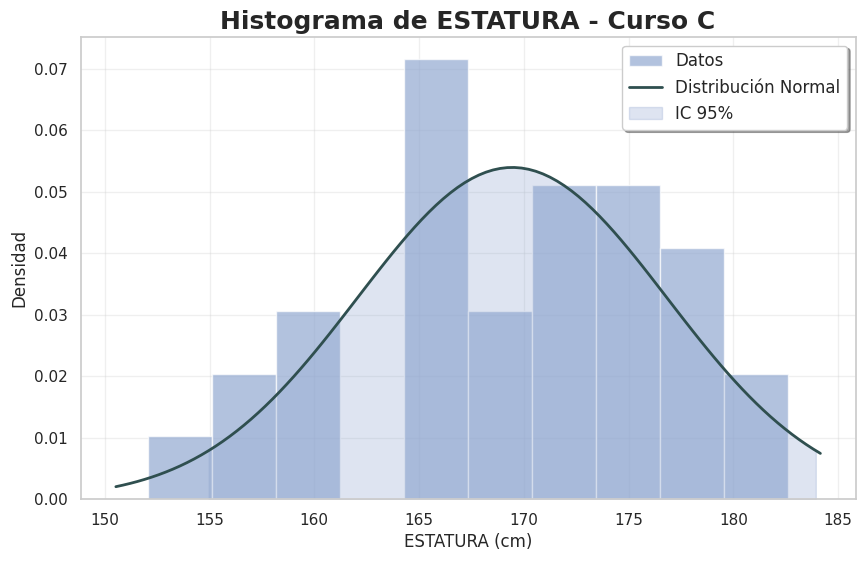

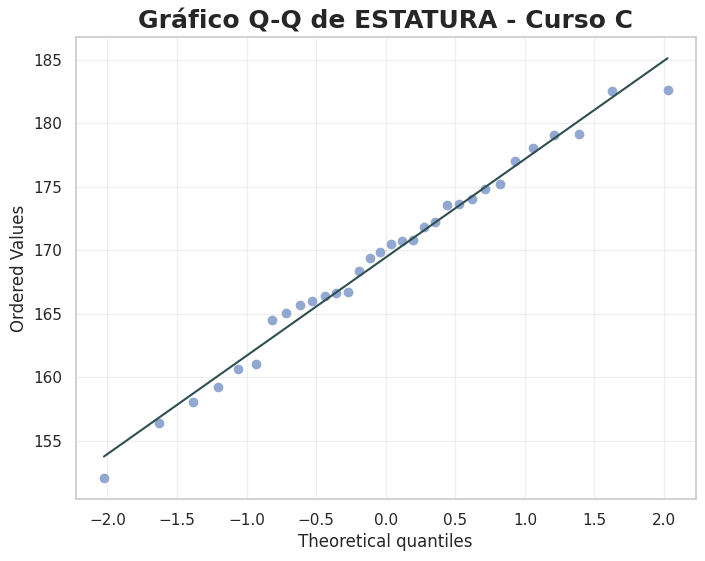


Shapiro-Wilk Test para ESTATURA en curso: B
Estadístico: 0.9856
P-valor: 0.9527
✅ No se rechaza $H_0$: Los datos parecen normales.


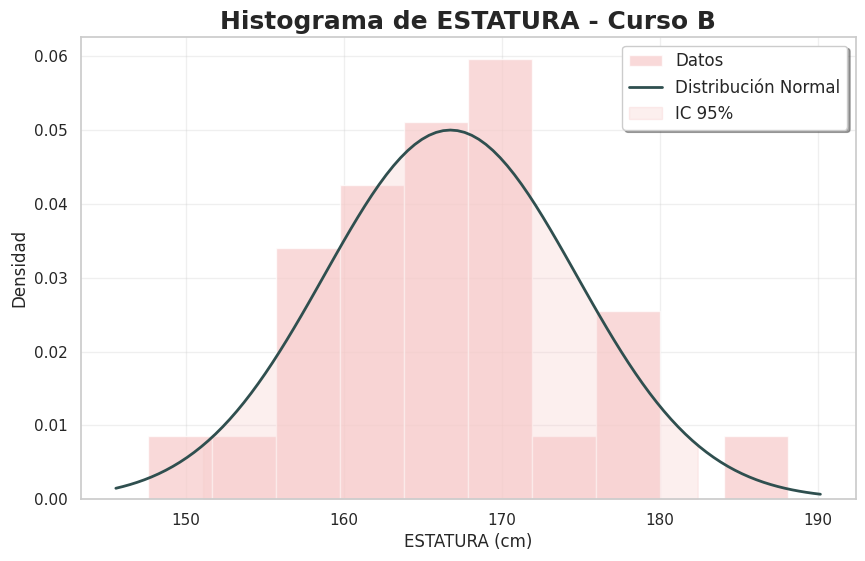

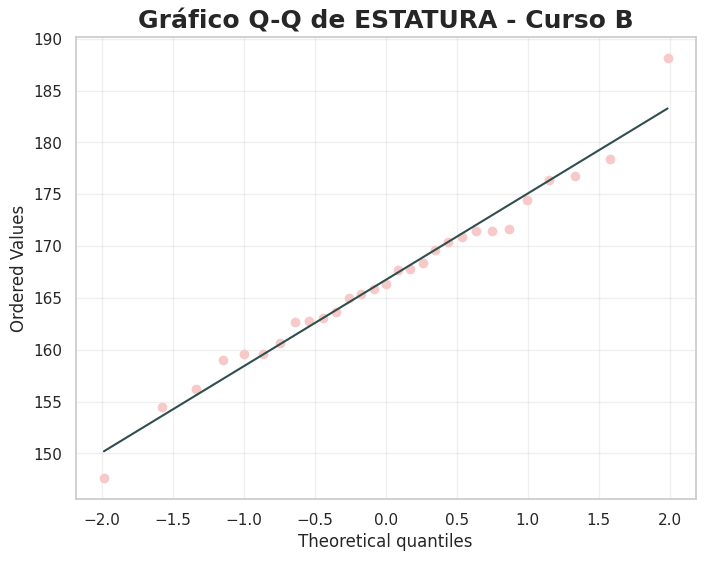


Shapiro-Wilk Test para ESTATURA en curso: A
Estadístico: 0.9634
P-valor: 0.3979
✅ No se rechaza $H_0$: Los datos parecen normales.


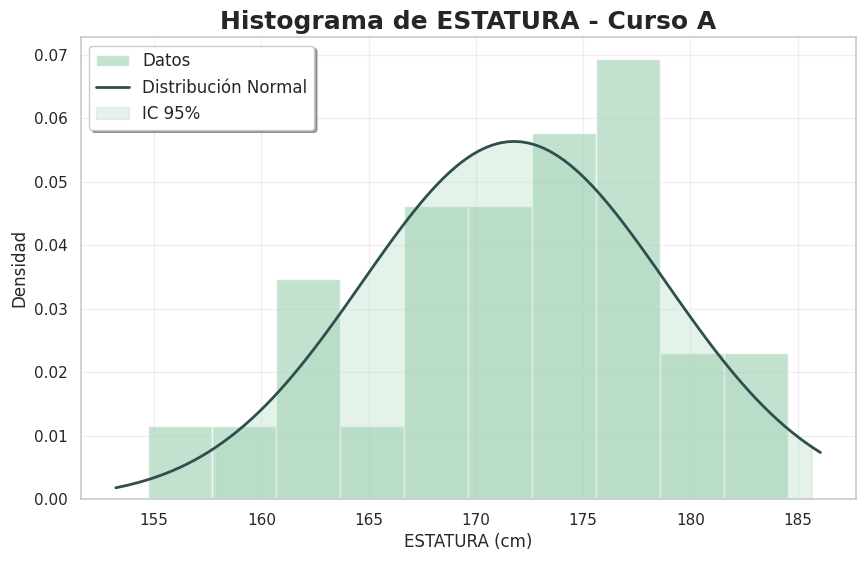

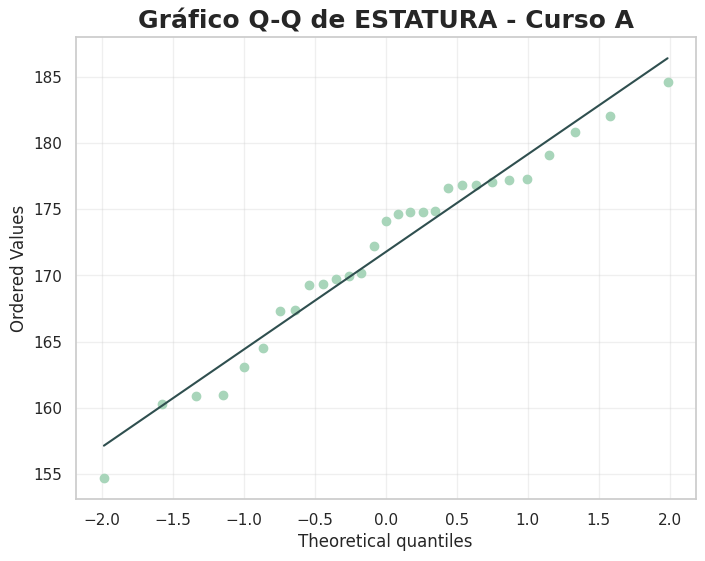

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro

# Configuración estética general con seaborn y matplotlib
sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 14, 'axes.titlesize': 18, 'axes.titleweight': 'bold'})

# Simulación del DataFrame
np.random.seed(123)
datos = pd.DataFrame({
    'CURSO': np.random.choice(['A', 'B', 'C'], size=90),
    'ESTATURA': np.random.normal(loc=170, scale=7, size=90)  # Altura promedio en cm
})

# Paleta pastel personalizada
color_pastel = {
    'A': '#A8D5BA',  # Verde pastel
    'B': '#F7CAC9',  # Rosa pastel
    'C': '#92A8D1'   # Azul pastel
}

# Análisis por curso
for curso in datos['CURSO'].unique():
    subset = datos[datos['CURSO'] == curso]['ESTATURA'].dropna()

    if len(subset) >= 3:
        shapiro_test = shapiro(subset)
        statistic = shapiro_test.statistic
        p_value = shapiro_test.pvalue

        print(f"\nShapiro-Wilk Test para ESTATURA en curso: {curso}")
        print(f"Estadístico: {statistic:.4f}")
        print(f"P-valor: {p_value:.4f}")

        alpha = 0.05
        decision = (
            "✅ No se rechaza $H_0$: Los datos parecen normales."
            if p_value > alpha else
            "❌ Se rechaza $H_0$: Los datos no parecen normales."
        )
        print(decision)

        # Histograma + curva normal
        plt.figure(figsize=(10, 6))
        plt.hist(subset, bins=10, density=True, alpha=0.7, color=color_pastel[curso], label='Datos')
        mu, std = stats.norm.fit(subset)
        xmin, xmax = plt.xlim()
        x = np.linspace(xmin, xmax, 100)
        p = stats.norm.pdf(x, mu, std)
        plt.plot(x, p, color='darkslategray', linewidth=2, label='Distribución Normal')

        # Intervalo de confianza 95%
        x_ci = np.linspace(*stats.norm.interval(0.95, loc=mu, scale=std), 100)
        p_ci = stats.norm.pdf(x_ci, mu, std)
        plt.fill_between(x_ci, p_ci, color=color_pastel[curso], alpha=0.3, label='IC 95%')

        plt.title(f'Histograma de ESTATURA - Curso {curso}')
        plt.xlabel('ESTATURA (cm)')
        plt.ylabel('Densidad')
        plt.legend(frameon=True, shadow=True, fontsize=12)
        plt.grid(alpha=0.3)
        plt.show()

        # Q-Q Plot con estilo pastel
        plt.figure(figsize=(8, 6))
        stats.probplot(subset, dist="norm", plot=plt)
        plt.title(f'Gráfico Q-Q de ESTATURA - Curso {curso}')
        plt.grid(True, alpha=0.3)
        plt.gca().get_lines()[0].set_color(color_pastel[curso])
        plt.gca().get_lines()[1].set_color('darkslategray')
        plt.show()

    else:
        print(f"⚠️ No se puede realizar la prueba para el curso {curso} (menos de 3 datos).")
